# Аналитика данных с помощью pandas и matplotlib

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.

Минимальные баллы для зачёта по этой работе - 1 балл. Если вы не набираете тут 1 балл, то по всему курсу вы получаете неуд<br> (см. слайды с семинара №1)

 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

## 1. Данные (2 балла)

Начнем с необходимых приготовлений.

In [76]:
import numpy as np
import pandas as pd
import matplotlib as mpl  
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла "coins.csv". Создайте объект типа pandas.DataFrame с именем coins и в качестве индекса выберите колонку с датой.

In [2]:
coins = pd.read_csv('coins.csv') # Paste your code here.
coins['datetime'] = coins['date']
coins = coins.set_index('datetime')

In [3]:
coins_unindexed = pd.read_csv('coins.csv')

In [4]:
coins.head(4)

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
datetime,,,,,,,,,,,,,
2013-04-28,2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Посмотрим что получилось

In [5]:
coins.head(4)

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
datetime,,,,,,,,,,,,,
2013-04-28,2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

#### Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):
#### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [6]:
print(len(coins), " - количество записей в датасете")
print(len(coins['name'].unique()), " - количество различных названий монет в датасете")

37588  - количество записей в датасете
70  - количество различных названий монет в датасете


#### 2. За какой период данные мы имеем? (0.4 балла)

In [7]:
print("Начало: ", coins['date'].min())
print("Конец: ", coins['date'].max())

Начало:  2013-04-28
Конец:  2018-06-06


#### 3. Есть ли пропуски в данных? Какой природы эти пропуски? (0.5 балла)

Так как методы min и max работают корректно, в 'date' нет прпоусков (а также так как мы выбрали эту колонку для индексации). Проверим остальные колонки:

In [8]:
for column in coins:
    if coins[column].isnull().values.any():
        print('В', column, coins[column].isnull().sum(), 'пустых значений.')

В price 327 пустых значений.
В txCount 1520 пустых значений.
В txVolume 1830 пустых значений.
В activeAddresses 1520 пустых значений.


#### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [9]:
print('Самая высокая цена -', coins['price'].max())
print('Монета с самой высокой ценой -', coins.loc[coins['price'] == coins['price'].max()]['name'])
# coins.loc[coins['price'] == coins['price'].max()]

Самая высокая цена - 19475.8
Монета с самой высокой ценой - datetime
2017-12-17    Bitcoin
Name: name, dtype: object


#### 5. У какой монеты самая высокая и самая низкая суммарная капитализация? Постройте круговую диаграмму с долями. (0.5 балла)

In [10]:
# pie = coins.groupby(["name"]).market.sum()
# pie = coins.groupby(["name"]).agg({'market':{'market_sum': 'sum'}})
# pie = pie.rename({'': 'sum'})
pie = pd.DataFrame(coins.groupby(["name"]).market.sum())
pie = pie.rename(columns={'market': 'sum'})
pie.head()

,sum
name,
0x,1.107025e+11
Aeternity,1.057863e+11
Aion,5.996538e+10
Aragon,3.421556e+10
Augur,1.676368e+11


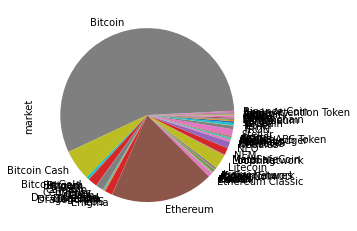

In [11]:
coins.groupby(["name"]).market.sum().plot.pie()

In [12]:
print(pie['sum'].max(), '- самая высокая суммарная капитализация у', pie.loc[pie['sum'] == pie['sum'].max()].index[0])
print(pie['sum'].min(), '- самая низкая суммарная капитализация у', pie.loc[pie['sum'] == pie['sum'].min()].index[0])

57439466431000.0 - самая высокая суммарная капитализация у Bitcoin
10608251.0 - самая низкая суммарная капитализация у KingN Coin


## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

#### Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.
На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать matplotlib.finance.candlestick_ohlc (mpl_finance.candlestick_ohlc), но можно и без него.

In [65]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    plt.figure(figsize=(16, 9))

    preprocessing = coins.loc[(coins['symbol'] == symbol) & (coins['date'] >= start_date) & (coins['date'] <= end_date)]
    plt.plot(preprocessing['date'], preprocessing['price'])

    s = 'График цены ' + symbol + ' с ' + str(start_date) + ' по ' + str(end_date)
    plt.title(s)
    plt.xlabel('Дата')
    plt.ylabel('Цена')

    # у меня вчера этот код работал, а теперь почему-то первый съехал в конец :(((
    x_arr = ['' for i in range(len(preprocessing['date']))]
    # print(x_arr)
    x_arr[0] = start_date
    # print(x_arr)
    x_arr[len(preprocessing.index) - 1] = end_date
    plt.xticks(x_arr)
    plt.grid()
    plt.show()

Посмотрим, что получилось:

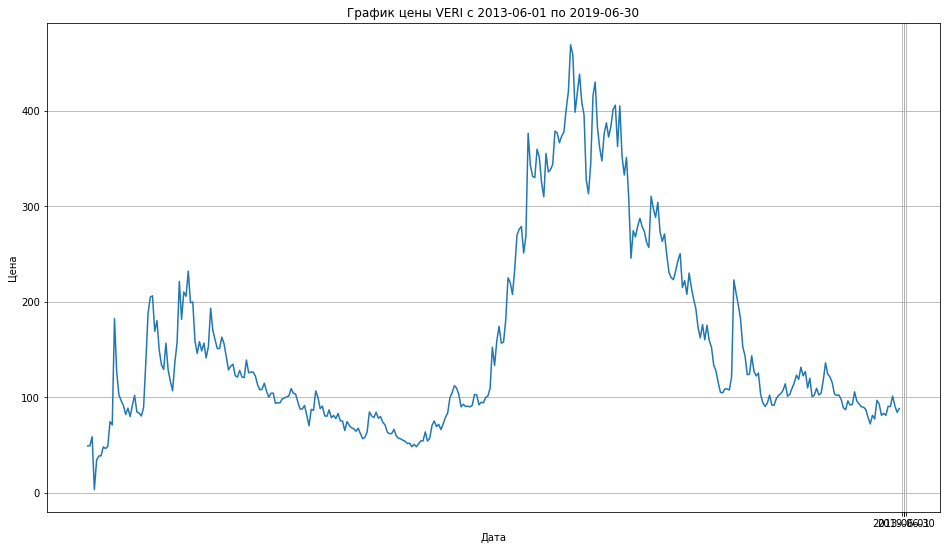

In [66]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30') 

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)
Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - pump'n'dump (накачка и сброс). Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются
вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде
успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

#### Ваша задача найти самый сильный pump'n'dump монеты на заданном промежутке времени. Для этого для каждого дня определим число pnd равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день когда pnd был максимален и величину pnd.

In [87]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    preprocessing = coins.loc[(coins['symbol'] == symbol) & (coins['date'] >= start_date) & (coins['date'] <= end_date)]
    if len(preprocessing) != 0:
        preprocessing['pnd'] = preprocessing['price'] / preprocessing[['open', 'close']].max(axis=1)
        max_pnd = preprocessing['pnd'].max()
        res0 = preprocessing.loc[preprocessing['pnd'] == max_pnd]
        if len(res0) != 0:
            res = res0.iloc[0]
            print('Максимальный pnd был замечен у монеты ', symbol, res['date'], ' c коэффициентом pnd ', res['pnd'])
        else:
            print('Data not found :(')
    else:
        print('Data not found :(')

In [88]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

Максимальный pnd был замечен у монеты  BTC 2017-06-04  c коэффициентом pnd  1.0


#### Сравните эти значения для разных монет.

In [90]:
# print(coins['symbol'].unique())
for i in coins['symbol'].unique():
    find_most_severe_pump_and_dump(coins, symbol=i, start_date='2017-06-01', end_date='2018-06-01')

Максимальный pnd был замечен у монеты  BTC 2017-06-04  c коэффициентом pnd  1.0
Максимальный pnd был замечен у монеты  LTC 2017-08-06  c коэффициентом pnd  1.0002134927412467
Максимальный pnd был замечен у монеты  DOGE 2018-01-09  c коэффициентом pnd  1.000066352597704
Максимальный pnd был замечен у монеты  VTC 2017-06-05  c коэффициентом pnd  1.0
Максимальный pnd был замечен у монеты  DGB 2017-07-15  c коэффициентом pnd  1.0000930405656865
Максимальный pnd был замечен у монеты  DASH 2017-10-01  c коэффициентом pnd  1.000030586651985
Максимальный pnd был замечен у монеты  MAID 2017-06-02  c коэффициентом pnd  1.0
Максимальный pnd был замечен у монеты  XLM 2017-09-19  c коэффициентом pnd  1.0000743383883437
Максимальный pnd был замечен у монеты  XVG 2018-02-02  c коэффициентом pnd  1.0000171482465918
Максимальный pnd был замечен у монеты  USDT 2017-06-01  c коэффициентом pnd  1.0
Максимальный pnd был замечен у монеты  XEM 2017-06-02  c коэффициентом pnd  1.0
Максимальный pnd был замечен

## 4. Окупаемость инвестиций (1 балл)

#### Вам нужно посчитать окупаемость инвестиций в криптовалюты на заданном промежутке времени. Окупаемость определяется как отношение изменения цены портфеля к исходной цене портфеля. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.
investments - dict в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD)

In [91]:
def compute_roi(coins, investments, start_date, end_date):
    start = 0
    end = 0
    for i in investments.keys():
        start += investments[i] * coins.loc[(coins['symbol'] == i) & (coins['date'] == start_date)].iloc[0]['price']
        end += investments[i] * coins.loc[(coins['symbol'] == i) & (coins['date'] == end_date)].iloc[0]['price']
    return end / start
    # Paste your code here

In [92]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

1.004831614576722

In [93]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

58.53575236064575

## 5. Технический анализ (1 балл)

Технический анализ это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - границы Болинджера. Кто-то верит, что график касаясь границы от него должен отражаться.

#### Нарисуйте график цены, скользящее среднее и [границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands) c параметрами N (window) = 21, K (width) = 2.

Границы считаются очень просто: (MA + Kσ) и (MA - Kσ), где MA - скользящее среднее за N дней, а σ - скользящее стандартное отклонение за N дней.

Тут вам поможет функция rolling для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [108]:
def plot_bollinger_bands(coins, symbol, window, width):
    n = 21
    k = 2
    preprocessing = coins.loc[coins['symbol'] == symbol]
    preprocessing['rolling_mean'] = preprocessing['price'].rolling(n).mean()
    preprocessing['rolling_std'] = preprocessing['price'].rolling(n).std()
    preprocessing['Bollinger_high'] = preprocessing['rolling_mean'] + k * preprocessing['rolling_std']
    preprocessing['Bollinger_low'] = preprocessing['rolling_mean'] - k * preprocessing['rolling_std']

    plt.figure(figsize=(16, 9))
    plt.plot(preprocessing['date'], preprocessing['price'], label='Цена', color='gold')
    plt.plot(preprocessing['date'], preprocessing['Bollinger_high'], label='Граница Боллинджера сверху', color='mediumpurple')
    plt.plot(preprocessing['date'], preprocessing['rolling_mean'], label='Средняя цена', color='blueviolet')
    plt.plot(preprocessing['date'], preprocessing['Bollinger_low'], label='Граница Боллинджера снизу', color='indigo')

    plt.title('График цены ' + symbol + ' от даты')
    plt.xlabel('Дата')
    plt.ylabel('Цена')
    plt.legend()

    x_arr = ['' for i in range(len(preprocessing['date']))]
    # print(x_arr)
    x_arr[0] = preprocessing['date'].min()
    # print(x_arr)
    x_arr[len(preprocessing['date']) - 1] = preprocessing['date'].max()
    plt.xticks(x_arr)
    plt.grid()
    # Paste your code here

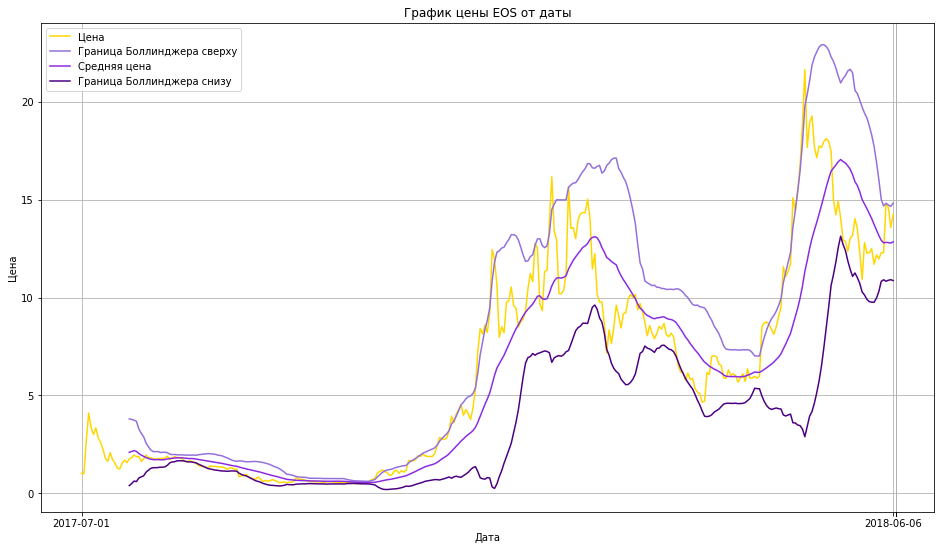

In [109]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

#### Сделайте вывод о том, выполнялось ли правило Боллинджера.

Работает через раз: есть моменты, где явно происходят скачки при достижении границ, а есть моменты, где оно продолжает двигаться в направлении (в частности, движение вверх перед большими пиками)

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на капитализацию. Давайте поймём почему.

#### Нарисуйте еще два графика. На первом должна быть общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC). На втором - доли капитализаций этих монет от общей капитализации рынка. При этом используйте данные начиная с 2017-07-01.

In [207]:
def plot_coins_capitalizations(coins, symbols, start_date):
    colors = {
        'BTC': 'hotpink', 
        'ETH': 'orchid', 
        'EOS': 'plum', 
        'BCH': 'darkviolet', 
        'XLM': 'blueviolet', 
        'LTC': 'mediumslateblue'
    }
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('График различных капитализаций')
    fig.set_size_inches(25, 9)
    ax1.set_title('Общие кап-ии монет')
    ax2.set_title('Доли кап-ий монет')
    ax1.grid()
    ax2.grid()

    preproc1 = coins.loc[(coins['date'] >= start_date)]
    preproc2 = pd.DataFrame(coins.loc[coins['date'] >= start_date].groupby('date')['market'].sum())
    preproc2 = preproc2.rename(columns={preproc2.columns[0]: 'sum'})
    # print(preproc2)
    for s in symbols:
        preproc_res = coins.loc[(coins['date'] >= start_date) & (coins['symbol'] == s)]
        # print(preproc_res)
        ax1.plot(preproc_res['date'], preproc_res['market'], color = colors[s], label=s)
        if (s == 'BCH'):
            preproc4 = coins.loc[(coins['date'] >= '2017-07-31')]
            preproc4 = pd.DataFrame(coins.loc[coins['date'] >= '2017-07-31'].groupby('date')['market'].sum())
            preproc3 = preproc4.rename(columns={preproc4.columns[0]: 'sum'})
            # print(preproc3)
        else:
            preproc3 = preproc2
        ax2.plot(preproc_res['date'], preproc_res['market'] / preproc3['sum'], color = colors[s], label=s)
    
    x_arr = list(coins.loc[(coins['date'] >= start_date) & (coins['symbol'] == 'BTC')]['date'])
    # print(x_arr)
    for i in range(len(x_arr)):
        if (i % 50 != 0) and (i != len(x_arr) - 1):
            x_arr[i] = ''
    # print(x_arr)
    ax1.set_xticks(x_arr)
    ax2.set_xticks(x_arr)
    ax1.legend()
    ax2.legend()

    ax1.set_xlabel('Дата')
    ax2.set_xlabel('Дата')
    ax1.set_ylabel('Общая капитализацтия')
    ax2.set_ylabel('Доля капитализации')
    # Paste your code here

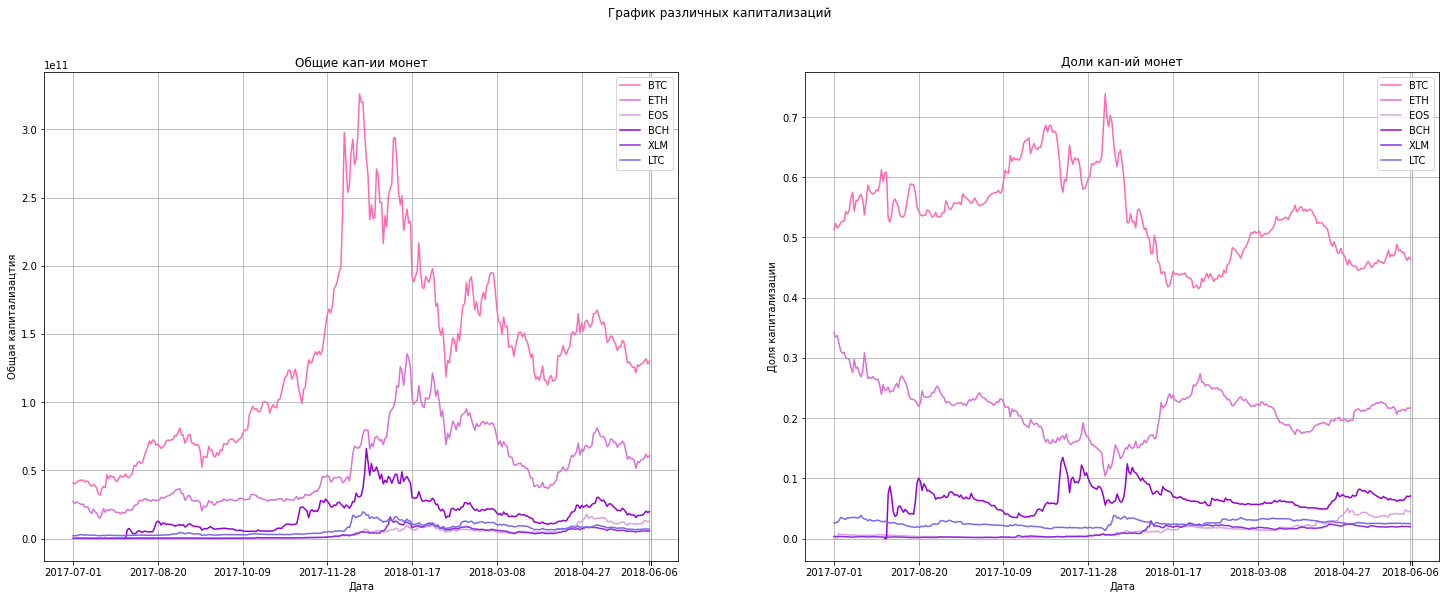

In [208]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

#### Проанализируйте зависимость доли капитализации альткойнов от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

По долям капитализаций: когда растёт доля капитализации BTC, она делает это за счёт долей капитализаций альткоинов и наоборот; поведение альткоинов между собой же похоже

## 7. Корреляции монет (1 балл)

#### Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние window дней до дня date с коэффициентом сглаживания alpha для набора монет symbols.  
#### Реализуйте функцию, которая будет возвращать квадратный DataFrame с числом строк и столбцов равным числу рассматриваемых монет и со значениями корреляций.

In [210]:
from scipy.stats.stats import pearsonr
from statsmodels.tsa.api import SimpleExpSmoothing

In [241]:
# Я не до конца понял, что от нас хотят; я использовал экспоненциальное сглаживание с заданным коэффициентом, потому что по терминам и количеству входных данных вроде подходит

def calc_exp(arr, a):
        return SimpleExpSmoothing(arr).fit(smoothing_level=a,optimized=False).fittedvalues

def calc_coins_correlations(coins, date, symbols, window, alpha):
    preproc1 = coins.loc[(coins['date'] <= date)]
    preproc2 = pd.DataFrame(coins.loc[coins['date'] <= date].groupby('date')['market'].sum())
    preproc2 = preproc2.rename(columns={preproc2.columns[0]: 'sum'})

    n = len(symbols)
    a = [0] * n
    for i in range(n):
        a[i] = [0] * window
    
    for i in range(n):
        preproc_res = coins.loc[(coins['date'] <= date) & (coins['symbol'] == symbols[i])]
        a[i] = list(calc_exp(list(preproc_res['market'] / preproc2['sum'])[-window:], alpha))

    return pd.DataFrame(np.array(a).transpose()).corr()

In [242]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

,0,1,2,3,4,5,6
0,1.00,-0.99,0.94,-0.99,-0.57,-0.47,-0.91
1,-0.99,1.00,-0.97,0.97,0.47,0.42,0.86
2,0.94,-0.97,1.00,-0.92,-0.43,-0.47,-0.79
3,-0.99,0.97,-0.92,1.00,0.65,0.54,0.93
4,-0.57,0.47,-0.43,0.65,1.00,0.81,0.79
5,-0.47,0.42,-0.47,0.54,0.81,1.00,0.57
6,-0.91,0.86,-0.79,0.93,0.79,0.57,1.00


Довольно интересно ещё взглянуть на 2017-12-27:

In [243]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

,0,1,2,3,4,5,6
0,1.00,-0.97,-0.99,-0.90,-0.78,-0.89,-0.98
1,-0.97,1.00,0.97,0.77,0.64,0.97,0.95
2,-0.99,0.97,1.00,0.86,0.80,0.90,0.99
3,-0.90,0.77,0.86,1.00,0.86,0.62,0.87
4,-0.78,0.64,0.80,0.86,1.00,0.48,0.82
5,-0.89,0.97,0.90,0.62,0.48,1.00,0.88
6,-0.98,0.95,0.99,0.87,0.82,0.88,1.00


## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия основанная на скользящих средних. Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае. Посмотрим на пример

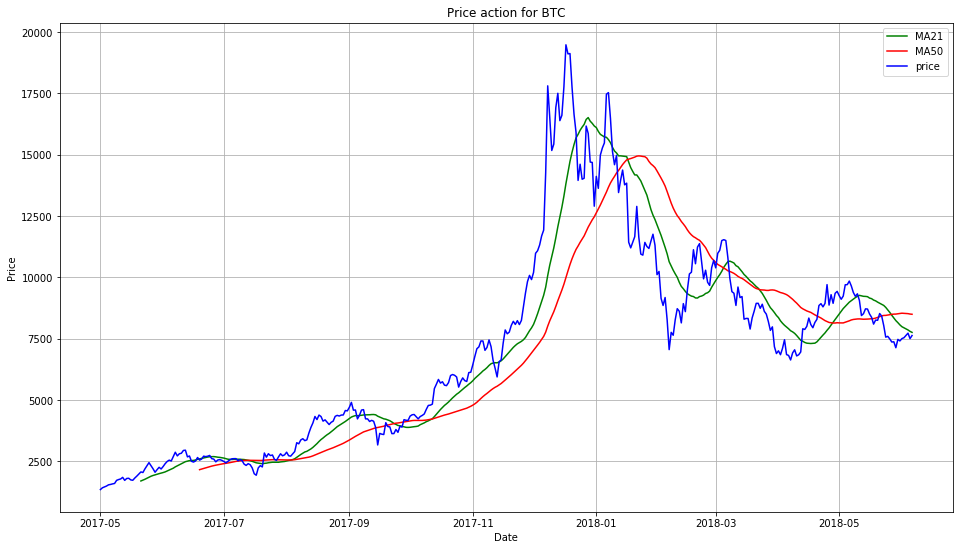

In [ ]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    
    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show() 

plot_moving_averages(
    coins=coins, 
    symbol='BTC', 
    leading_window=21, 
    lagging_window=50, 
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия.
#### Реализуйте функцию, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании 

#### Notes:
Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод shift(1) у Series.
Отношение цен закрытия за сегодня и за вчера - это мой multiplier за сегодняшний день. При этом давайте строить графики накопления для multipliers. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй- 0.5 и в третий 2. То график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).

При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый threshold (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [ ]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    # Paste your code here

In [ ]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21, 
    min=1, 
    max=200, 
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1, 
    max=200, 
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0, 
    max=0.20, 
    step=0.001, 
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

#### Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели.

## 9. Отказ от ответственности 
Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.